In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
columns = ['age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','target']
train = pd.read_csv('train.csv', names=columns)
test = pd.read_csv('test.csv', names=columns, skiprows=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  object
 1   workclass       30726 non-null  object
 2   fnlwgt          32562 non-null  object
 3   education       32562 non-null  object
 4   education.num   32562 non-null  object
 5   marital.status  32562 non-null  object
 6   occupation      30719 non-null  object
 7   relationship    32562 non-null  object
 8   race            32562 non-null  object
 9   sex             32562 non-null  object
 10  capital.gain    32562 non-null  object
 11  capital.loss    32562 non-null  object
 12  hours.per.week  32562 non-null  object
 13  native.country  31979 non-null  object
 14  target          32562 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


In [ ]:
print ("The train data has",train.shape)
print ("The test data has",test.shape)
train.head()

The train data has (32562, 15)
The test data has (16281, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [5]:
nans = train.shape[0] - train.dropna().shape[0]
print ("%d rows have missing values in the train data" %nans)

nand = test.shape[0] - test.dropna().shape[0]
print ("%d rows have missing values in the test data" %nand)


2399 rows have missing values in the train data
1221 rows have missing values in the test data


In [6]:
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

In [7]:
cat = train.select_dtypes(include=['O'])
cat.apply(pd.Series.nunique)

age                  74
workclass             9
fnlwgt            21649
education            17
education.num        17
marital.status        8
occupation           15
relationship          7
race                  6
sex                   3
capital.gain        120
capital.loss         93
hours.per.week       95
native.country       42
target                3
dtype: int64

In [8]:
#Education
train.workclass.value_counts(sort=True)
train.workclass.fillna('Private',inplace=True)


#Occupation
train.occupation.value_counts(sort=True)
train.occupation.fillna('Prof-specialty',inplace=True)


#Native Country
train['native.country'].value_counts(sort=True)
train['native.country'].fillna('United-States',inplace=True)

In [9]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
target            0
dtype: int64

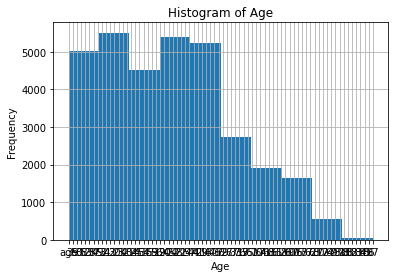

In [10]:
train.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [11]:
train.target.value_counts()/train.shape[0]


 <=50K    0.759167
 >50K     0.240802
target    0.000031
Name: target, dtype: float64

In [12]:
pd.crosstab(train.education, train.target,margins=True)/train.shape[0]

target,<=50K,>50K,target,All
education,,,,
10th,0.026749,0.001904,0.000000,0.028653
11th,0.034242,0.001843,0.000000,0.036085
12th,0.012284,0.001013,0.000000,0.013298
1st-4th,0.004975,0.000184,0.000000,0.005159
5th-6th,0.009735,0.000491,0.000000,0.010227
7th-8th,0.018611,0.001228,0.000000,0.019839
9th,0.014956,0.000829,0.000000,0.015785
Assoc-acdm,0.024630,0.008138,0.000000,0.032768
Assoc-voc,0.031356,0.011087,0.000000,0.042442


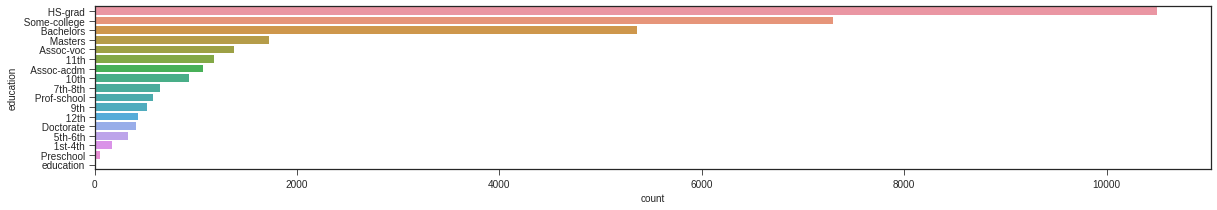

In [13]:
import seaborn as sns
ig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=train, order=train['education'].value_counts().index)

In [14]:
from sklearn import preprocessing

for x in train.columns:
    if train[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[x].values))
        train[x] = lbl.transform(list(train[x].values))
        X = np.array(train.drop(['target'], 1))
        y = np.array(train['target'])




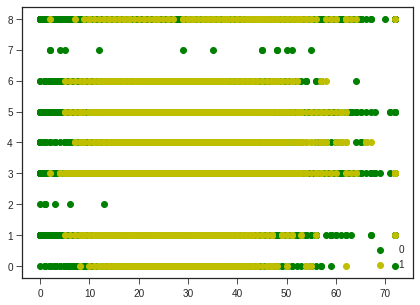

In [15]:
plt.figure(figsize=(7, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend();

In [16]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [17]:
m, n = X.shape
K = 2
K, m, n

(2, 32562, 14)

In [18]:
theta = np.zeros(n)

In [19]:
def g(z):
  """ sigmoid """
  return 1 / (1 + np.exp(-z))

In [20]:
def h(X, theta):
  return g(X @ theta)

In [21]:
preds = h(X, theta)
preds.shape, preds[:10]

((32562,), array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]))

In [22]:
def J(preds, y):
  return 1/m * (-y @ np.log(preds) - (1 - y) @ np.log(1 - preds))

In [23]:
def compute_gradient(theta, X, y):
  preds = h(X, theta)
  gradient = 1/m * X.T @ (preds - y)
  return gradient

In [24]:
compute_gradient(theta, X, y)

array([ 4.22489405e+00,  9.11967938e-01,  2.76692247e+03,  2.53712917e+00,
        2.41949205e+00,  8.04972053e-01,  1.64372582e+00,  5.46971930e-01,
        9.23822247e-01,  1.29906025e-01, -8.92021375e-01, -1.28048031e-01,
        7.86054296e+00,  9.39045513e+00])

In [25]:
preds = h(X, theta)
J(preds, y)

0.6931471805599453

In [26]:
hist = {'loss': [], 'acc': []}
alpha = 0.1

for i in range(100):
  gradient = compute_gradient(theta, X, y)
  theta -= alpha * gradient

  # loss
  preds = h(X, theta)
  loss = J(preds, y)
  hist['loss'].append(loss)

  # acc
  c = 0
  for j in range(len(y)):
    if (h(X[j], theta) > .5) == y[j]:
      c += 1
  acc = c / len(y)
  hist['acc'].append(acc)

  # print stats
  if i % 10 == 0: print(loss, acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in matmul
  


nan 0.7591671273263313
nan 0.24080216202935936
nan 0.7591671273263313
nan 0.7591671273263313
nan 0.24080216202935936
nan 0.7591057060377127
nan 0.7591671273263313
nan 0.24080216202935936
nan 0.7591978379706407
nan 0.759136416682022


In [27]:
hist['loss'][-1], hist['acc'][-1]

(nan, 0.7591057060377127)

In [28]:
preds = h(X, theta) >0.5
Acc=(preds == y).sum() / len(y)
print("Accuracy:",Acc*100)

Accuracy: 75.91057060377126


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
def precision(preds, labels):
  tp = ((preds == 1) == (y == 1)).sum()
  fp = ((preds == 1) == (y == 0)).sum()
  return tp / (tp + fp)

precision_scores=precision(preds, y)
precision_scores


0.7591131038294997

In [30]:
def recall(preds, labels):
  tp = ((preds == 1) == (y == 1)).sum()
  fn = ((preds == 0) == (y == 1)).sum()
  return tp / (tp + fn)

recall_scores=recall(preds, y)
recall_scores


0.759136416682022

In [31]:
def f1(preds, labels):
  return 2 * (precision(preds, labels) * recall(preds, labels)) / (precision(preds, labels) + recall(preds, labels))

f1(preds, y)

0.7591247600767753

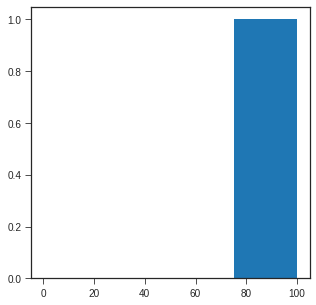

In [32]:
#plt.plot(X_train,y_train,'--',color='red',label = 'Actual')
fig, ax = plt.subplots(figsize =(5, 5)) 
ax.hist(Acc*100, bins = [0, 25, 50, 75, 100]) 
plt.show() 



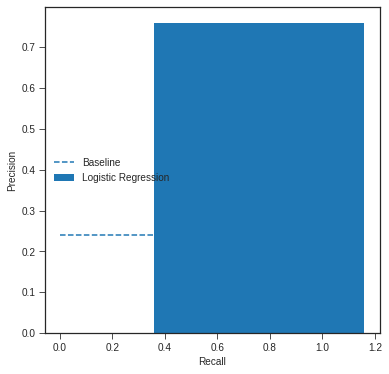

In [33]:

fig, ax = plt.subplots(figsize=(6,6))
ax.bar(recall_scores, precision_scores, label='Logistic Regression')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

In [70]:
import numpy as np
from collections import Counter


def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:

    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:

    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        
        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
data = train
X = np.array(train.drop(['target'], 1))
y = np.array(train['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier()  
clf = clf.fit(X_train,y_train)  
y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print ("Accuracy:", acc*100)

Accuracy: 81.58460436073292
